# SUV Purchase classification

<b >[Henry Jacob](https://www.linkedin.com/in/henry-jacob-96872918a)

20th October 2021

### Introduction

suv dataset contains details of users (UserId, Gender, Age, Estimated Salary) and tha target variable is whether the user purchased the SUV or not.

![](http://marqueelimoco.com/wp-content/uploads/2016/04/Lincoln-Navigator-SUV-e1441974980629.jpg)

### Methodology

We will be creating our model with the help of Python so we start off by importing all the required packages.

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Collecting data

In [2]:
df = pd.read_csv('suv_data.csv')
df.head(2)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0


### Analysing data

In [3]:
# to see the shape
df.shape

(400, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 14.1+ KB


In [5]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


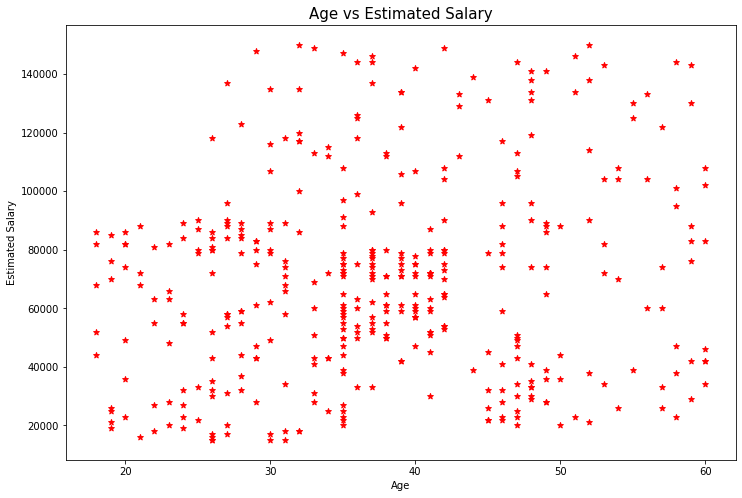

In [6]:
# to plot a scatter plot
plt.figure(figsize = (12, 8))
plt.scatter(df['Age'], df['EstimatedSalary'], color = 'red', marker = '*')
plt.title('Age vs Estimated Salary', size = 15)
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()

In [7]:
# to see value counts
df['Gender'].value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

<AxesSubplot:ylabel='Frequency'>

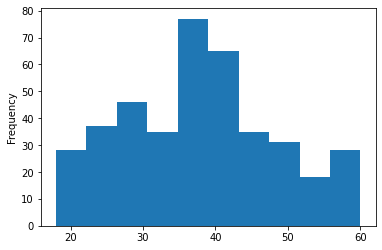

In [8]:
# to plot histogram
df['Age'].plot(kind = 'hist')

<AxesSubplot:xlabel='Age', ylabel='Density'>

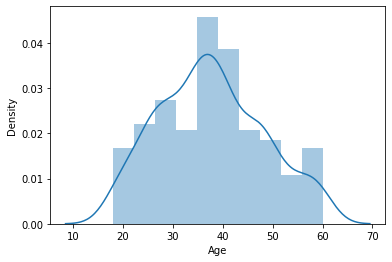

In [9]:
sns.distplot(df['Age'])

In [10]:
sal = pd.DataFrame(df.groupby('Gender')['EstimatedSalary'].agg('sum').reset_index())
sal

,Gender,EstimatedSalary
0,Female,14639000
1,Male,13258000


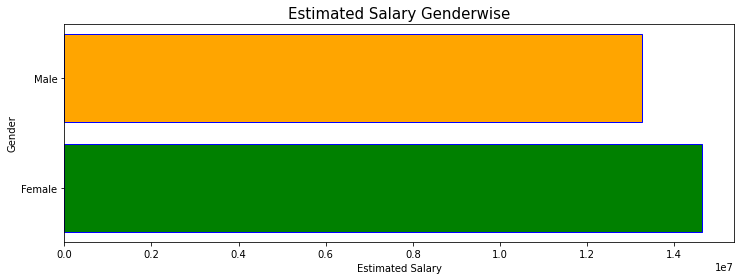

In [11]:
plt.figure(figsize = (12, 4))
clr = ['green', 'orange']
plt.barh(y = sal['Gender'], width = sal['EstimatedSalary'], color = clr, edgecolor = 'blue')
plt.title('Estimated Salary Genderwise', size = 15)
plt.xlabel('Estimated Salary')
plt.ylabel('Gender')
plt.show()

In [12]:
df.head(2)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0


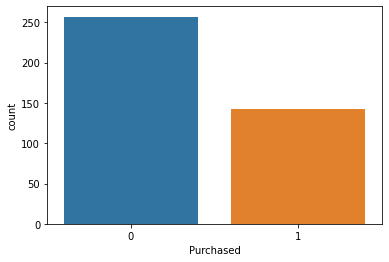

In [13]:
sns.countplot(x = 'Purchased', data = df)
plt.show()

In [14]:
purchase = pd.DataFrame(df.groupby('Gender')['Purchased'].agg('count').reset_index())
purchase

,Gender,Purchased
0,Female,204
1,Male,196


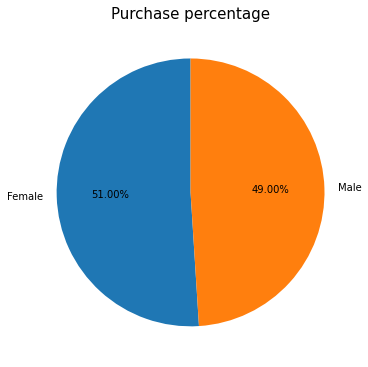

In [15]:
plt.figure(figsize = (6, 8))
plt.pie(purchase['Purchased'], labels=purchase['Gender'], startangle= 90, autopct= '%.2f%%')
plt.title('Purchase percentage', size = 15)
plt.show()

In [16]:
pur_0 = df[df['Purchased'] == 0]
pur_1 = df[df['Purchased'] == 1]

In [17]:
print(f'Purchased percentage :{pur_1.shape[0]/df.shape[0]* 100}')

Purchased percentage :35.75


<AxesSubplot:ylabel='Frequency'>

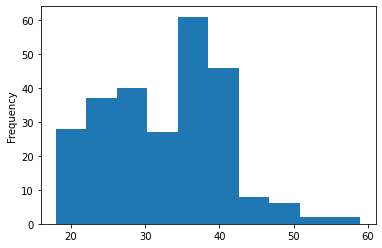

In [18]:
pur_0['Age'].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

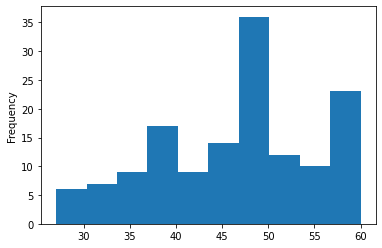

In [19]:
pur_1['Age'].plot(kind = 'hist')

In [20]:
df['Age'].min()

18

In [21]:
df['Age'].max()

60

In [22]:
# function to create range of values
def age_range(col):
    age = col
    if age < 31:
        return '18 - 30'
    elif (age > 30) & (age < 41):
        return '31 - 40'
    elif (age > 40) & (age < 51):
        return '41 - 50'
    else:
        return '51 - 60'

In [23]:
df['age_range'] = df['Age'].apply(age_range)
df.head(2)

,User ID,Gender,Age,EstimatedSalary,Purchased,age_range
0,15624510,Male,19,19000,0,18 - 30
1,15810944,Male,35,20000,0,31 - 40


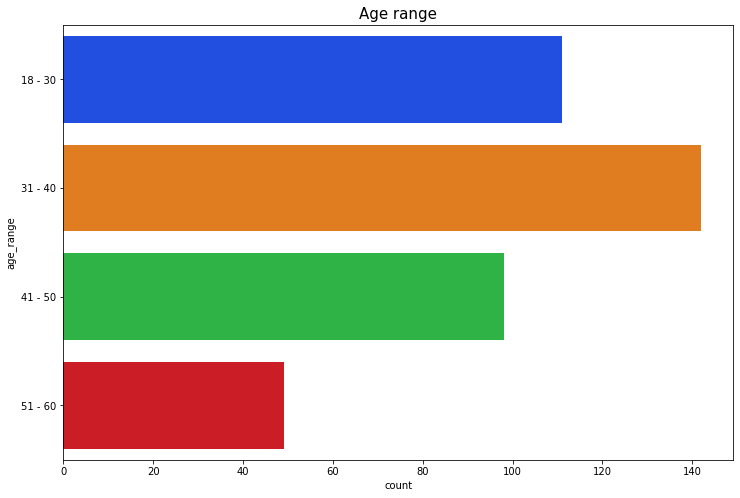

In [24]:
# to see age range for all
plt.figure(figsize = (12, 8))
sns.countplot(y = 'age_range', data = df, palette='bright')
plt.title('Age range', size = 15)
plt.show()

In [25]:
pur_0['age_range'] = pur_0['Age'].apply(age_range)
pur_0.head(2)

,User ID,Gender,Age,EstimatedSalary,Purchased,age_range
0,15624510,Male,19,19000,0,18 - 30
1,15810944,Male,35,20000,0,31 - 40


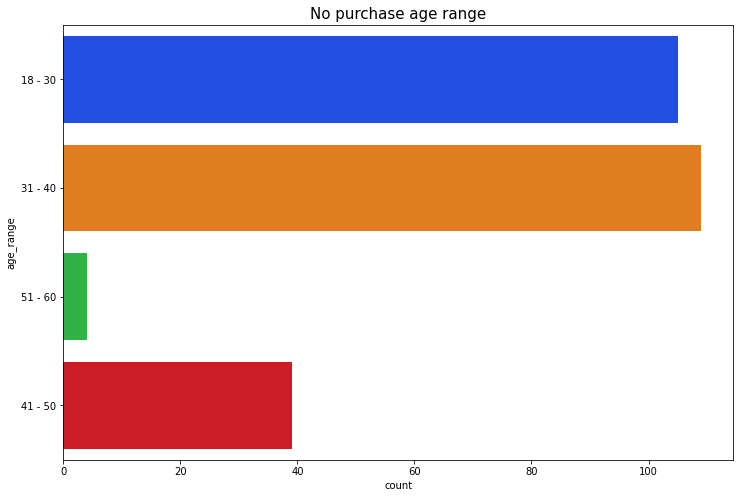

In [26]:
# to see age range for no purchase
plt.figure(figsize = (12, 8))
sns.countplot(y = 'age_range', data = pur_0, palette='bright')
plt.title('No purchase age range', size = 15)
plt.show()

In [27]:
pur_1['age_range']= pur_1['Age'].apply(age_range)
pur_1.head(2)

,User ID,Gender,Age,EstimatedSalary,Purchased,age_range
7,15694829,Female,32,150000,1,31 - 40
16,15733883,Male,47,25000,1,41 - 50


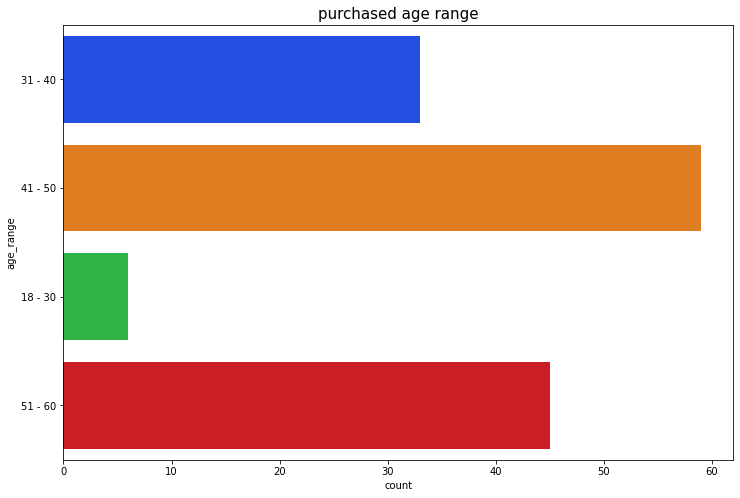

In [28]:
# to see age range for purchase
plt.figure(figsize = (12, 8))
sns.countplot(y = 'age_range', data = pur_1, palette='bright')
plt.title('purchased age range', size = 15)
plt.show()

In [29]:
pur_0['Gender'].value_counts()

Male      130
Female    127
Name: Gender, dtype: int64

In [30]:
pur_1['Gender'].value_counts()

Female    77
Male      66
Name: Gender, dtype: int64

In [31]:
male = df[df['Gender'] == 'Male']
female = df[df['Gender'] == 'Female']

In [32]:
male['EstimatedSalary'].mean(), female['EstimatedSalary'].mean()

(67642.85714285714, 71759.80392156863)

In [33]:
print(f'Male percentage bought :{(66/male.shape[0])*100}')

Male percentage bought :33.6734693877551


In [34]:
print(f'female percentage bought :{(77/female.shape[0])*100}')

female percentage bought :37.745098039215684


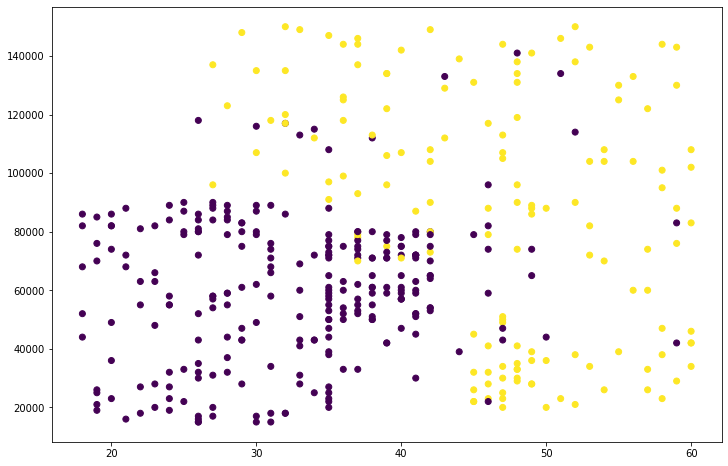

In [35]:
# to plot scatter plot
plt.figure(figsize = (12, 8))
plt.scatter(df['Age'], df['EstimatedSalary'], c= df['Purchased'])
plt.show()

In [36]:
df[(df['Age'] > 45) | (df['EstimatedSalary'] > 100000)]['Purchased'].value_counts()

1    122
0     23
Name: Purchased, dtype: int64

In [37]:
df[(df['Age'] < 45) | (df['EstimatedSalary'] < 100000)]['Purchased'].value_counts()

0    254
1    114
Name: Purchased, dtype: int64

In [38]:
122/(122+23)

0.8413793103448276

### Data wrangling

In [39]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
age_range          0
dtype: int64

In [40]:
# to replace string
df['Gender'] = df['Gender'].replace({
    'Male':1,
    'Female':0
})

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    int64 
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
 5   age_range        400 non-null    object
dtypes: int64(5), object(1)
memory usage: 17.2+ KB


In [42]:
df.drop(['User ID', 'age_range'], axis = 1, inplace = True)

In [43]:
df.head(2)

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0


### Train

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
from sklearn.naive_bayes import MultinomialNB

In [46]:
nb = MultinomialNB()

In [47]:
X = df.drop(['Purchased'], axis = 1).copy()
y = df['Purchased'].copy()

In [48]:
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0, stratify=y)

In [50]:
nb.fit(X_train, y_train)

MultinomialNB()

### Test

In [51]:
pred = nb.predict(X_test)

### Accuracy

In [52]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [53]:
confusion_matrix(y_test, pred)

array([[50,  1],
       [23,  6]], dtype=int64)

In [57]:
print(f'Accuracy score is :{accuracy_score(y_test, pred) * 100}')

Accuracy score is :70.0


In [55]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.68      0.98      0.81        51
           1       0.86      0.21      0.33        29

    accuracy                           0.70        80
   macro avg       0.77      0.59      0.57        80
weighted avg       0.75      0.70      0.63        80



### Results

Estimated salary of female is higher than male.

More male purchased SUV than female.

51% of the male purchased SUV whereas 49% female purchased SUV.

Only 35.75% of users purchased SUV.

Users have age range from 18 to 60.

Most of the users have age range from 31 to 40.

Mostly those who doesn’t purchase SUV have the age range from 18 to 30.

Mostly those who purchased the SUV age range from 41 to 50.

84% of the users purchased only if their estimated salary is greater than 100000 or their age is greater than 45.